# 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

# data

In [2]:
df_heart = pd.read_csv('../../data/heart_2020_cleaned.csv')
df_heart[:5]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## data info

In [3]:
print('data shape : ',df_heart.shape)
print('')
print(df_heart.info())

data shape :  (319795, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  objec

|항목|설명|Unique|분류|
|--|--|--|--|
|HeartDisease|관상동맥 심장 질환(CHD) 또는 심근경색(MI)을 앓은 적이 있다고 보고한 응답자|Yes,No|범주형 - 2분류|
|BMI|체질량 지수(BMI)||수치형|
|Smoking|평생 담배 100개비 이상을 피웠는지|Yes,No|범주형 - 2분류|
|AlcoholDrinking|성인 남성은 주 14잔 이상,여성은 주 7잔 이상 마시는 과음자|Yes,No|범주형 - 2분류|
|Stroke|뇌졸중을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalHealth|신체적 질병과 부상을 포함한 신체 건강에 대해 지난 30일 중 며칠 동안 신체 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|MentalHealth|정신 건강에 대해 지난 30일 중 며칠 동안 정신 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|DiffWalking|걷거나 계단을 오르는 데 심각한 어려움이 있는지|Yes,No|범주형 - 2분류|
|Sex|성별|Male,Female|범주형 - 2분류|
|AgeCategory|연령대|5년 단위 18 ~ 80 연령대 분류|범주형 - 14분류|
|Race|인종,민족 추정값|white,black,asian,american indian/alaskan native,hispanic,other|범주형 - 6분류|
|Diabetic|당뇨병을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalActivity|지난 30일 중 본업 외 신체 운동 여부|Yes,No|범주형 - 2분류|
|GenHealth|인지 건강상태|poor,fair,good,very good, excellent|범주형 - 5분류|
|SleepTime|평균 수면시간|1~24|범주형-24분류|
|Asthma|천식을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|KidneyDisease|결석, 방광염 또는 요실금을 제외한 신장 질환을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|SkinCancer|피부암을 앓은 적이 있는지|Yes,No|범주형 - 2분류|

## 분석 진행 방향

1. 각 columns별 카운팅 분석
2. 환자 세분화 후 세그먼트화 
3. 마켓 바구니 분석 기법 적용하여 발병 원인 분석


## 결측치 확인

In [4]:
df_heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## 이용자 세분화
- 심장병 유발자를 추출하여 세분화를 진행한다

In [5]:
df_imnotok = df_heart.query('HeartDisease == "Yes"')
df_imnotok = df_imnotok.reset_index()
df_imnotok = df_imnotok.drop(columns=['index','HeartDisease'])

In [6]:
df_imnotok

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
1,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
2,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
3,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
4,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27368,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
27369,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
27370,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
27371,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


### data 전처리
- 데이터 그루핑 작업 진행

In [7]:
df_imnotok.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156
std,6.577151,11.487819,9.171932,1.780863
min,12.210000,0.000000,0.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000
50%,28.340000,0.000000,0.000000,7.000000
75%,32.690000,15.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


- BMI는 표준 분류법 (저체중 < 18.5, 정상체중 < 23, 과체중 < 25 , 경도비만 < 30, 중도비만 < 35>, 고도비만 > 35)
- SleepTime은 불면증, 과다수면의 경우가 다르므로 4가지로 분류 (중증 불면증 < 4 경도 불면증 < 7, 정상 < 9, 경도 과다수면 < 12 , 중증 과다수면 > 12)
- PhysicalHealth, MentalHealth는 평균값을 기준으로 좋음 / 나쁨 으로 분류

In [8]:
# BMI 그룹핑

def BMI_change(text):
    if text < 18.5:
        text = '저체중'
    elif text < 23:
        text = '정상체중'
    elif text < 25:
        text = '과체중'
    elif text < 30:
        text = '경도비만'
    elif text < 35:
        text = '중도비만'
    else:
        text = '고도비만'
    
    return text

df_imnotok['BMI'] = df_imnotok['BMI'].apply(BMI_change)

In [9]:
# SleepTime 그룹핑

def SleepTime_change(text):
    if text < 4:
        text = '중증 불면증'
    elif text < 7:
        text = '경도 불면증'
    elif text < 9:
        text = '정상'
    elif text < 12:
        text = '경도 과다수면'
    else:
        text = '중증 과다수면'
    
    return text

df_imnotok['SleepTime'] = df_imnotok['SleepTime'].apply(SleepTime_change)

In [10]:
# PhysicalHealth, MentalHealth 그룹핑

def mean_change(get_list):
    change_list = list()
    list_mean = np.mean(get_list)

    for i in get_list:
        if i >= list_mean:
            change_list.append('나쁨')
        else:
            change_list.append('좋음')

    return change_list

df_imnotok['PhysicalHealth'] = mean_change(df_imnotok['PhysicalHealth'])
df_imnotok['MentalHealth'] = mean_change(df_imnotok['MentalHealth'])

- 이 외 항목에서 Yes or No로 같은 내용을 가지고 있으므로 내용을 바꿔준다

In [11]:
# yes / no change to name

def change_yesno(dataframe):
    # column추출
    columns = dataframe.columns.to_list()

    for i in columns:
        # 시리즈 추출
        serise = dataframe[i]

        # 시리즈 이름 추출
        name = serise.name

        # 변환 리스트 초기화
        change_list = list()

        # 내용 변환
        for j in serise:
            if j[:3] == 'Yes':
                content = j.replace('Yes',name,1)
                change_list.append(content)
            elif j[:3] == 'No,':
                content = j.replace('No','No ' + name + ' ',1)
                change_list.append(content)
            elif j[:2] == 'No':
                content = j.replace('No','No ' + name,1)
                change_list.append(content)
            else:
                break
        
        # 리스트가 제작되었다면 변경
        if change_list:
            dataframe[i] = change_list

    return dataframe

In [12]:
df_imnotok = change_yesno(df_imnotok)

### 각 항목별 시각화

#### 성별 / 음주 / 흡연

- 예상
    + 성별은 유의미한 차이를 보이지 않을 것이다.
    + 음주는 심장질환에 매우 큰 영향을 끼칠것이다.
    + 흡연은 심장질환에 매우 큰 영향을 끼칠것이다. 

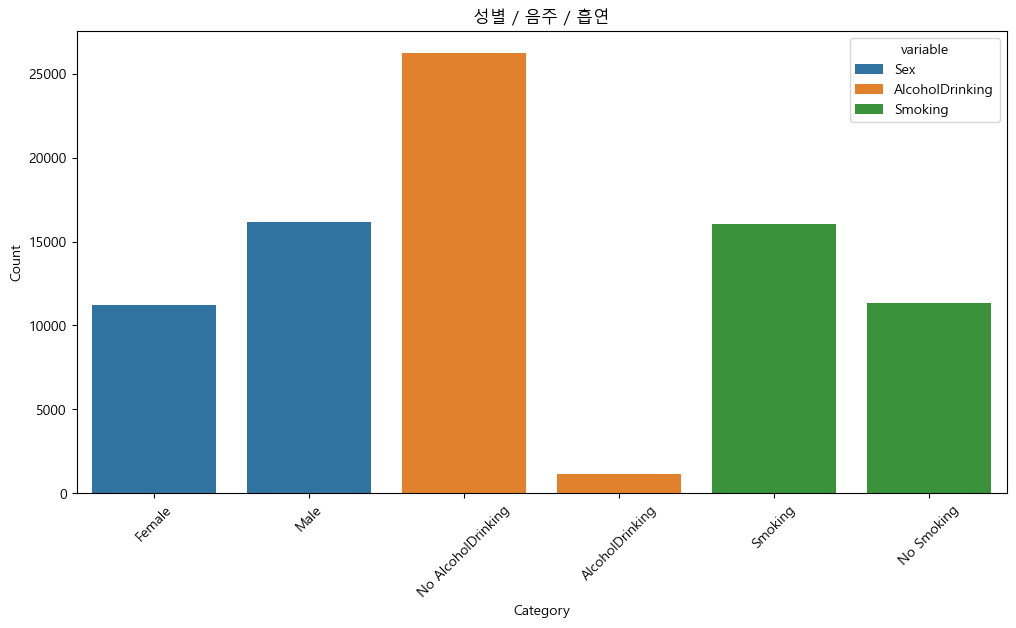

In [13]:
merged_data = pd.concat([df_imnotok['Sex'], df_imnotok['AlcoholDrinking'], df_imnotok['Smoking']], axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data.melt(), x='value', hue='variable')
plt.title('성별 / 음주 / 흡연')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- 여성보다는 남성이 더 많았으며, 그 비율은 흡연 여부와 비슷했다.
- 예상대로 흡연을 하는 사람들이 아닌 사람들보다 더 많았다. 다만 그 비율이 생각처럼 크지 않았다.
- 의외로 음주 여부의 비율이 매우 크게 차이가 났다.
    + 그 비율이 매우 높아서 음주를 안하는게 유병률이 높은게 아니라 심장병을 앓고 나서 금주를 했을 가능성이 매우 높아 보인다.

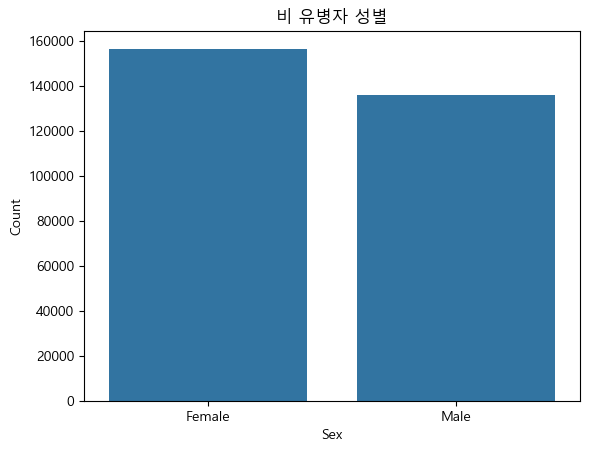

In [14]:
# 성별간 차이를 확인하기 위해 비 유병자 성별 시각화

df_imok = df_heart.query('HeartDisease == "No"')

sns.countplot(data=df_imok, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('비 유병자 성별')
plt.show()

- 비 유병자의 경우 여성이 남성보다 근소하게 더 많은 것을 확인
- 성별은 어느정도 심장질환에 영향을 준다고 판단할 수 있다.
    + 단, 성별은 직접적인 건강위험요소가 아니므로 실제 성별 때문에 차이가 발생했다고 보기 어렵다.

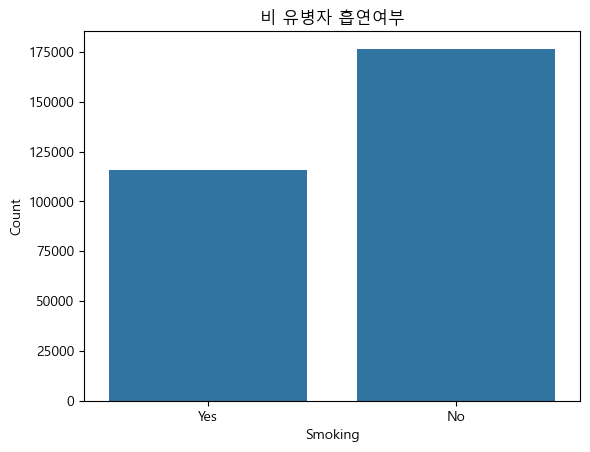

In [15]:
# 흡연의 위험도를 확인하기 위해 비 유병자 흡연여부 시각화

sns.countplot(data=df_imok, x='Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('비 유병자 흡연여부')
plt.show()

- 흡연에서는 비 발병자의 비흡연 비율이 더 높았다.
- 따라서 흡연여부는 심장질환 발병에 영향을 끼친다.
- 흡연 여부는 서로 독립적이므로 Odds ratio를 이용해 그 영향도를 계산할 수 있다.

In [16]:
count_smoke = df_imnotok['Smoking'].value_counts().values
Odds_ratio = (count_smoke[0] / count_smoke[1])

print('흡연을 할 경우 심장질환의 발병확률은 비흡연할 때보다 {}배 더 높다.'.format(Odds_ratio))

흡연을 할 경우 심장질환의 발병확률은 비흡연할 때보다 1.41469654199012배 더 높다.


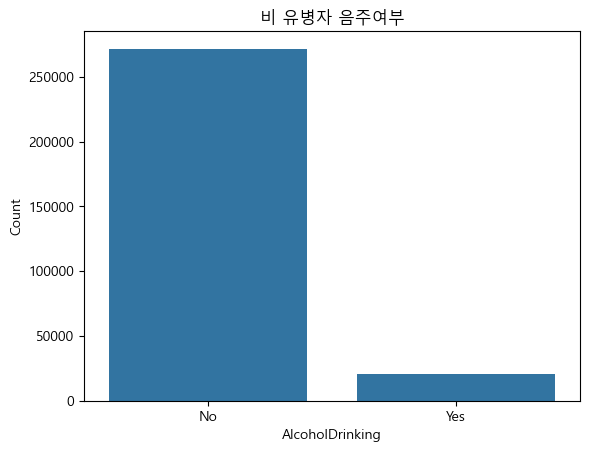

In [17]:
# 음주 가설을 확인하기 위해 비 유병자 음주여부 시각화

sns.countplot(data=df_imok, x='AlcoholDrinking')
plt.xlabel('AlcoholDrinking')
plt.ylabel('Count')
plt.title('비 유병자 음주여부')
plt.show()

- 비유병자와 유병자간 매우 비슷한 비율을 보이고 있다.
- 이는 음주의 여부와 심장질환의 직접적인 관계가 있기 어렵다는 판단을 내릴 수 있다.

#### 수면시간

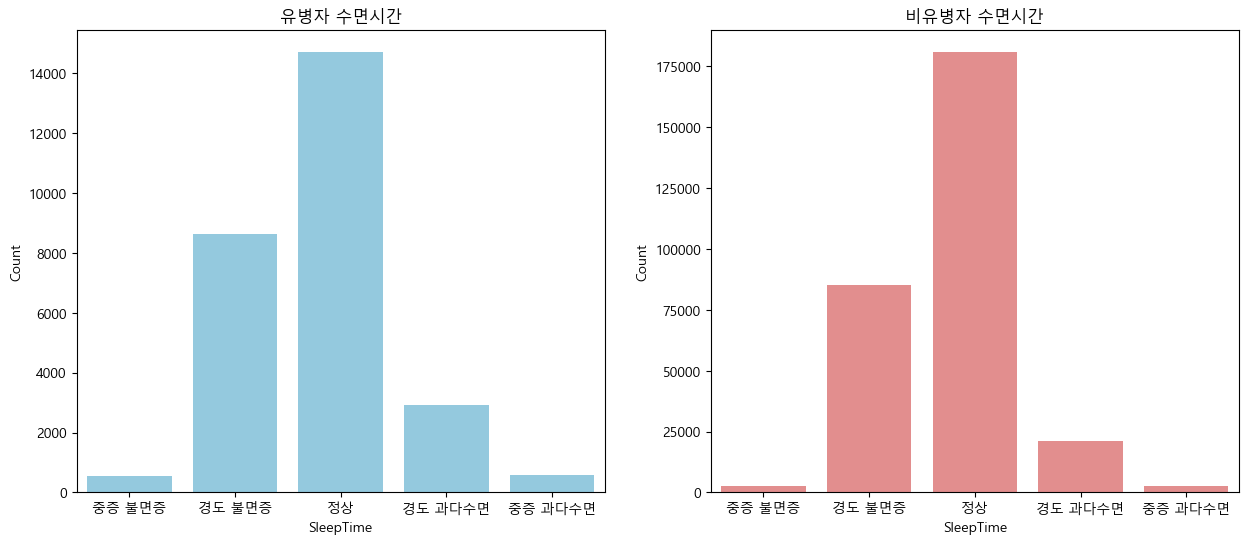

<Figure size 640x480 with 0 Axes>

In [18]:
# orders 설정
orders = ['중증 불면증', '경도 불면증', '정상', '경도 과다수면', '중증 과다수면']

# 그래프 그리기
plt.figure(figsize=(15, 6))

# 첫 번째 서브플롯: 유병자 수면시간 그래프
plt.subplot(1, 2, 1)
sns.countplot(data=df_imnotok, x='SleepTime', order=orders, color='skyblue')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('유병자 수면시간')

# 두 번째 서브플롯: 비유병자 수면시간 그래프
plt.subplot(1, 2, 2)
sns.countplot(data=df_imok, x=df_imok['SleepTime'].apply(SleepTime_change), order=orders, color='lightcoral')
plt.ylabel('Count')
plt.xlabel('SleepTime')
plt.title('비유병자 수면시간')
plt.show()

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


- 수면시간의 경우 유병자와 비유병자의 시간에 대한 비율이 크게 다르지 않는다.
- 따라서, 수면시간은 심장질환 유병률에 관여고 있다고 말하기 어렵다.

### 연령
- 연령이 올라갈 수록 유병률이 올라갈 것이다.

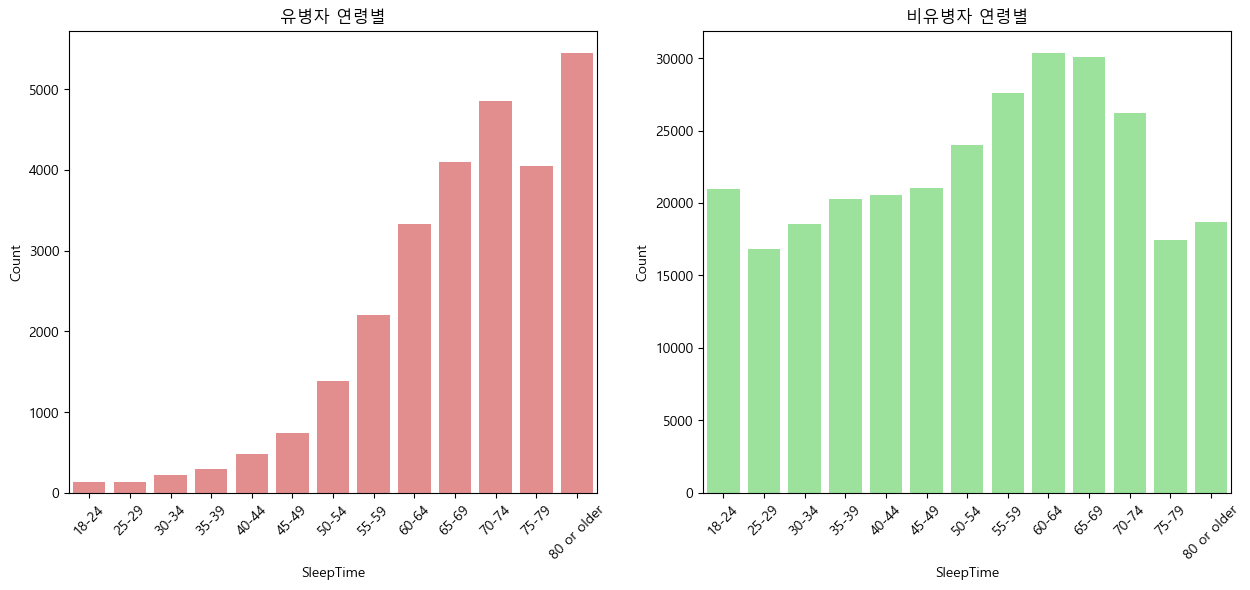

In [19]:
orders = sorted(df_imnotok['AgeCategory'].unique())


plt.figure(figsize=(15, 6))


# 첫 번째 서브플롯: 유병자 연령별 그래프
plt.subplot(1, 2, 1)
sns.countplot(data=df_imnotok, x='AgeCategory',order=orders,color='lightcoral')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('유병자 연령별')
plt.xticks(rotation=45)

# 두 번째 서브플롯: 비유병자 연령별 그래프
plt.subplot(1, 2, 2)
sns.countplot(data=df_imok, x='AgeCategory',order=orders,color='lightgreen')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('비유병자 연령별')
plt.xticks(rotation=45)


plt.show()

- 유병자 집단에서는 나이가 많은 집단의 수가 상승하는 걸 확인할 수 있다.
- 비 유병자 집단에서는 비교적 고르게 분포하는 것을 확인할 수 있다.
    + 비유병자 집단의 데이터가 역순이 아니므로 심장질환과 나이의 직접적인 상관관계가 있다고 말하기 어렵다.
    + 따라서, 본 데이터는 일생에 심장질환을 앓은 적이 있느냐가 척도이므로 나이가 들면 들수록 유병확률이 높아지기 때문에 신체의 건강척도와 나이에 의한 상관관계가 있어서 유병률이 올라갈 것이다고 말하기는 어렵다.


### 뇌졸증 / 보행 불편 / 운동

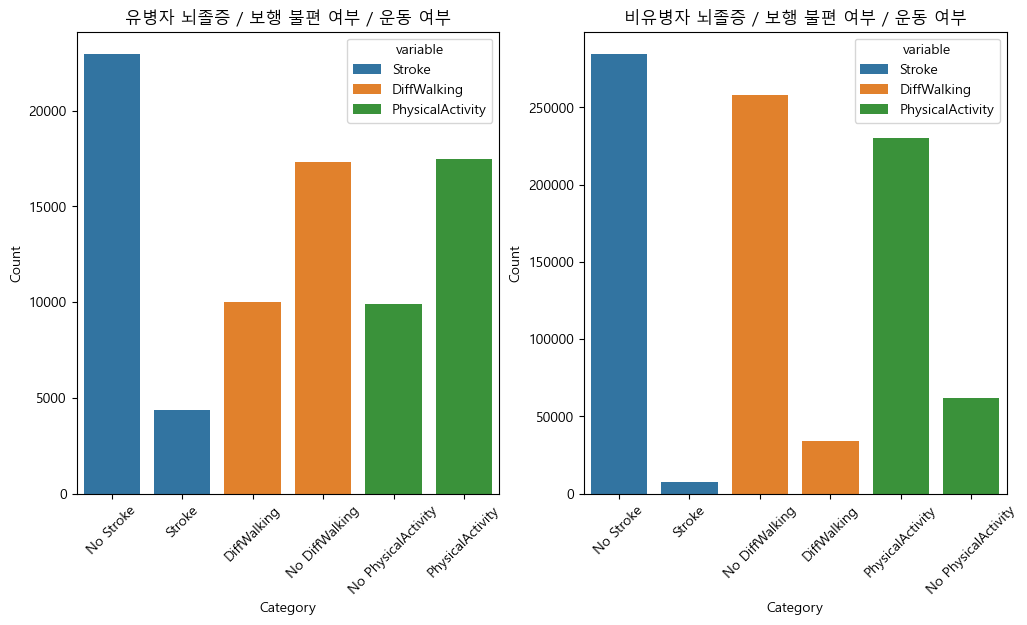

In [20]:
merged_data = pd.concat([df_imnotok['Stroke'], df_imnotok['DiffWalking'], df_imnotok['PhysicalActivity']], axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=merged_data.melt(), x='value', hue='variable')
plt.title('유병자 뇌졸증 / 보행 불편 여부 / 운동 여부')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
merged_data = pd.concat([df_imok['Stroke'], df_imok['DiffWalking'], df_imok['PhysicalActivity']], axis=1)
merged_data = change_yesno(merged_data)

sns.countplot(data=merged_data.melt(), x='value', hue='variable')
plt.title('비유병자 뇌졸증 / 보행 불편 여부 / 운동 여부')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

- 각각 뇌질환에 연관된 대상들을 확인하여본 결과 뇌졸증, 보행불편도, 신체활동에서 뚜렷한 차이를 발견하였다
- 신기한 점으로는 보행이 불편하고, 신체활동을 하지 않은 사람들의 발병률이 더 낮았다는 것이다.
    + 이것은 일반적으로 생각하기 어려운 내용으로, 인과관계가 잘못되었을 수도 있다는 생각이 들었다.
    + 나이와 연관되어 있을 가능성이 있으므로 확인작업을 진행해보자

### 나이 카테고리에 대한 보행 불편과 신체활동
- 각 카테고리별 각각의 그래프를 확인

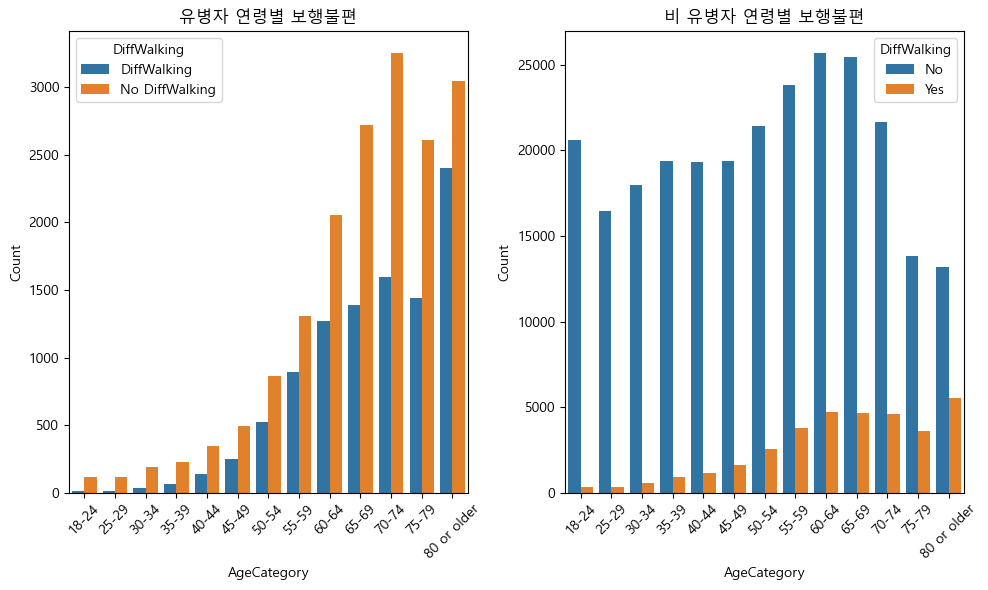

In [21]:
orders = sorted(df_imnotok['AgeCategory'].unique())

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

sns.countplot(data=df_imnotok, x='AgeCategory', order=orders, hue='DiffWalking')
plt.title('유병자 연령별 보행불편')
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.legend(title='DiffWalking')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)

sns.countplot(data=df_imok, x='AgeCategory', order=orders, hue='DiffWalking')
plt.title('비 유병자 연령별 보행불편')
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.legend(title='DiffWalking')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

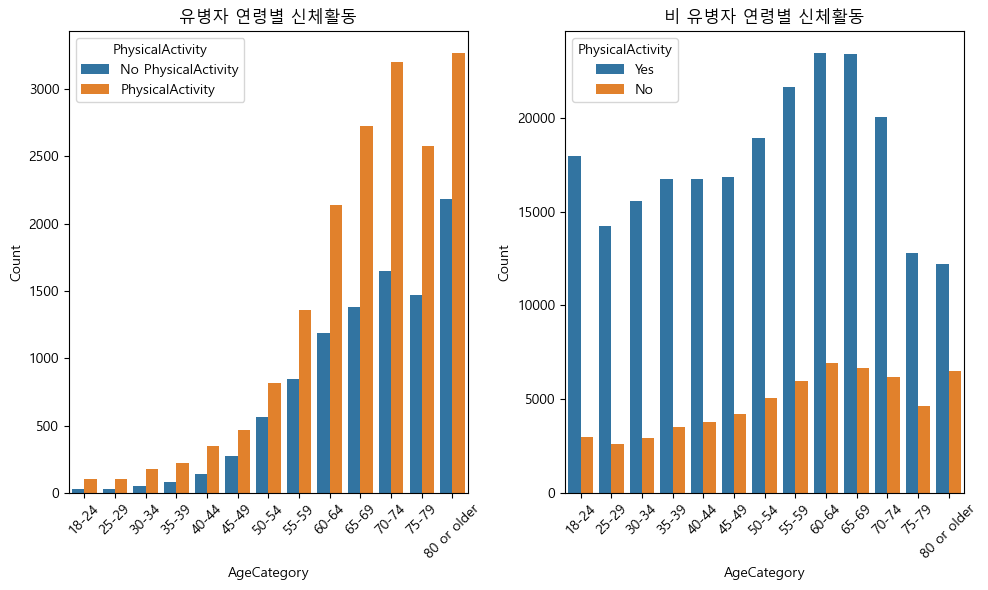

In [22]:
plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)

sns.countplot(data=df_imnotok, x='AgeCategory', order=orders,hue='PhysicalActivity')
plt.title('유병자 연령별 신체활동')
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.legend(title='PhysicalActivity')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)

sns.countplot(data=df_imok, x='AgeCategory', order=orders,hue='PhysicalActivity')
plt.title('비 유병자 연령별 신체활동')
plt.xlabel('AgeCategory')
plt.ylabel('Count')
plt.legend(title='PhysicalActivity')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

- 그래프의 모양이 나이에 대한 유병률 그래프를 따라가기 때문에 이는 유병에 대한 상관관계가 있다라고 보기 보다는 나이와 동일하게 움직이는 것으로 보인다.
- 이를 확인하기 위해 나이에 대한 연관 테스트 진행 

### 연관성 테스트 연령 : 보행 / 신체활동
- counting에 의한 그래프 이므로 수치형 => 정규성 점검
- record 갯수가 나이 카테고리이므로 pearson test(5000개 이하)

In [26]:
from scipy.stats import shapiro

In [51]:
s_notok_age_count = df_imnotok['AgeCategory'].value_counts()
s_ok_age_count = df_imok['AgeCategory'].value_counts()

df_notok_diff = df_imnotok.groupby(['AgeCategory', 'DiffWalking']).size().unstack(level='DiffWalking')
df_ok_diff = df_imok.groupby(['AgeCategory', 'DiffWalking']).size().unstack(level='DiffWalking')

df_notok_physic = df_imnotok.groupby(['AgeCategory', 'PhysicalActivity']).size().unstack(level='PhysicalActivity')
df_ok_physic = df_imok.groupby(['AgeCategory', 'PhysicalActivity']).size().unstack(level='PhysicalActivity')

- 정규성 테스트

In [58]:
# 정규성 확인 함수 제작

def isNormal(get_series):
    
    name = get_series.index.name
    
    statistic, p_value = shapiro(get_series)

    if p_value > 0.05:
        print(f"{name}는 정규 분포를 따릅니다.")
        print("")
    else:
        print(f"{name}는 정규 분포를 따르지 않습니다.")
        print("")
    pass

In [60]:
# 유병자 나이 카테고리 정규성 검증

isNormal(s_notok_age_count)

AgeCategory는 정규 분포를 따르지 않습니다.



In [61]:
# 비 유병자 나이 카테고리 정규성 검증

isNormal(s_ok_age_count)

AgeCategory는 정규 분포를 따릅니다.



In [62]:
# 유병자 보행 불편 정규성 검증

for i in df_notok_diff.columns:
    
    isNormal



Index(['DiffWalking', 'No DiffWalking'], dtype='object', name='DiffWalking')

```




여기까지 했다 여기부터 하면됀다

1. 나이와 그 행동에 대한 정규성을 검증
2. 정규성이 검증되거나 안되거나 상관관계 확인 -> 피어슨 or 스피어맨 근데 비정규분포일꺼라서 스피어맨으로 진행

3. 만약 관계가 있다고 하면 그 뭐냐 유병률보다는 나이에 상관이 있다
-> 물론 이경우 나이가 유병률과 상관이 없다! 는 알아서 해야됌







```

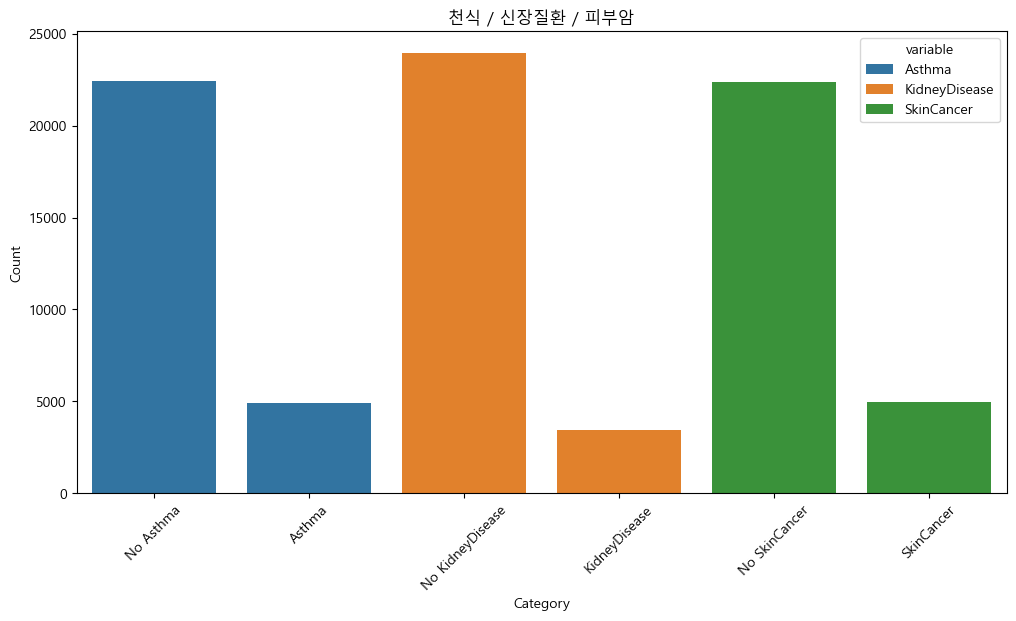

In [23]:
merged_data = pd.concat([df_imnotok['Asthma'], df_imnotok['KidneyDisease'], df_imnotok['SkinCancer']], axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data.melt(), x='value', hue='variable')
plt.title('천식 / 신장질환 / 피부암')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

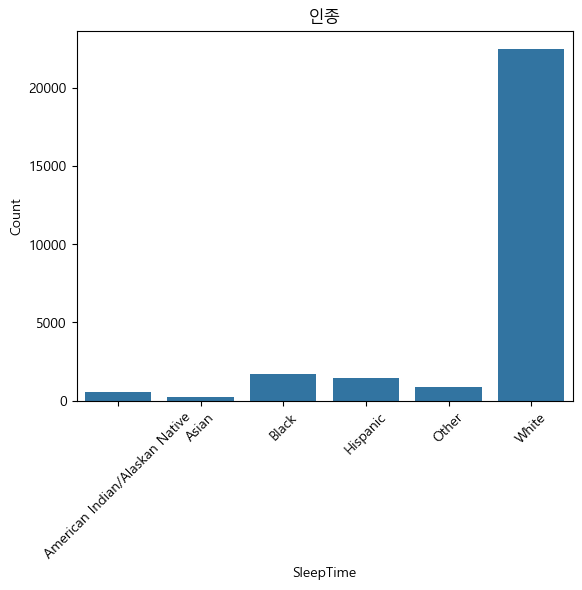

In [24]:
orders = sorted(df_imnotok['Race'].unique())

sns.countplot(data=df_imnotok, x='Race',order=orders)
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('인종')
plt.xticks(rotation=45)
plt.show()

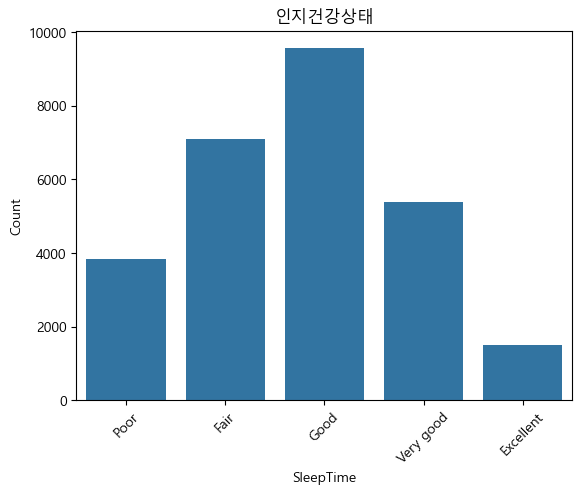

In [25]:
orders = ['Poor','Fair','Good','Very good','Excellent']

sns.countplot(data=df_imnotok, x='GenHealth',order=orders)
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('인지건강상태')
plt.xticks(rotation=45)
plt.show()